## import modules and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## extract features and subset of entire data set
For this example, we will only only work with two out of three classes present in the data set. Namely: 'setosa' and 'versicolor'. Additionally, only the sepal length and petal length features are used

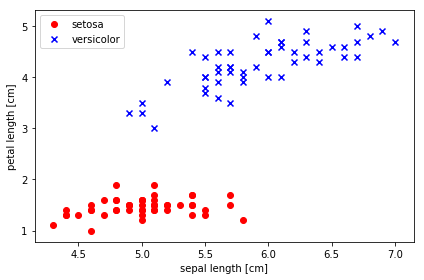

In [2]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values # first 100 samples contain data of setosa and versicolor flowers
y = np.where(y == 'Iris-setosa', -1, 1) # If y is equal to 'Iris-setosa', set label to -1 otherwise 1

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values # extract training data, we will use sepal length and petal length for our classification

# plot data
plt.scatter(X[:50, 0], X[:50, 1], # first 50 are in the setosa class
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], # 50 to 100 are versicolor class
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [3]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=10, random_seed=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_seed = random_seed

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        
        # initialization (random initialisation is better than fixed e.g. zeros)
        rgen = np.random.RandomState(self.random_seed) 
        self.b_ = rgen.normal(loc=0.0, scale=0.01, size=1) 
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) 
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                # zip takes iterables and makes iterator that aggregates elements based
                # on the iterables passed, and returns an iterator of tuples.
                """Implement fit function here
                1. Calculate your update first (target - prediction) 
                    The speed of learning is determined by the eta parameter
                2. Update the weights and biases by adding the update
                3. Count the amount of errors you made this iteration. 
                    Hint: the update is zero when the prediction is correct""" 
                inputs=self.net_input(xi)
                output=self.predict(inputs)
                update=target-output
                self.w_=self.w_+self.eta*update*xi
                self.b_=self.b_+self.eta*update
                if update != 0:
                    errors+=1
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input
        Remember, the input to a perceptron is the dotproduct of the input times the weights plus a bias"""
        inputs=np.dot(self.w_,X)+self.b_
        return inputs

    def predict(self, X):
        """Return class label after unit step
        Return a 1 if the net input is larger or equal to 0.0 and a -1 otherwise"""
        output=np.where(X>0.0, 1,-1)
        return output

## Training the model

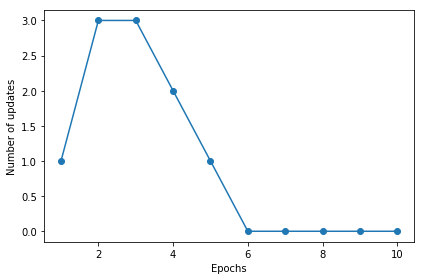

In [4]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

## Function for plotting regions

In [5]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    pdb.set_trace()
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [6]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

> <ipython-input-5-77fecca959c7>(18)plot_decision_regions()
-> Z = Z.reshape(xx1.shape)
(Pdb) c


ValueError: cannot reshape array of size 143350 into shape (305,235)